In [ ]:
!pip install qiskit

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name


In [56]:
seed = 10600
aqua_globals.random_seed = seed

In [3]:
from google.colab import files
uploaded = files.upload()

Saving data2.csv to data2.csv


In [4]:
import io
import pandas as pd
dat = pd.read_csv(io.BytesIO(uploaded['data2.csv']))

In [5]:
safe = []
unsafe = []
for i in range(len(dat)):
    if dat['Safe(1)/Unsafe(0)'].values[i] == 1:
        safe.append([dat['Case rate(weekly)'].values[i],dat['Test Rate(weekly)'].values[i]])
    else: 
        unsafe.append([dat['Case rate(weekly)'].values[i],dat['Test Rate(weekly)'].values[i]])

In [41]:
feature_dim = 2
training_input = {'safe' : np.array(safe[0:8]), 'unsafe' : np.array(unsafe[0:35])} 
test_input = {'safe' : np.array(safe[8:-1]), 'unsafe' : np.array(unsafe[35:-1])} 
class_labels = {'unsafe', 'safe'}

In [42]:
onearr = [1]*len(safe)
zeroarr = [0]*len(unsafe)
label = np.concatenate((onearr,zeroarr))
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
join = safe + unsafe
print(join)

[[48, 3195], [66, 3055], [54, 3038], [30, 4900], [68, 3946], [32, 5063], [50, 4506], [50, 6354], [50, 3216], [68, 5089], [32, 8090], [55, 4981], [50, 2294], [83, 4624], [27, 1364], [72, 2140], [41, 1801], [45, 1478], [57, 1321], [86, 1802], [114, 2025], [44, 1578], [71, 1539], [102, 1695], [74, 2564], [118, 2694], [55, 2474], [59, 2649], [89, 4118], [76, 1820], [90, 2267], [62, 2578], [24, 1632], [69, 2794], [71, 2656], [53, 2859], [161, 2974], [85, 3629], [64, 1754], [71, 2956], [137, 2156], [61, 2228], [28, 2420], [36, 1542], [128, 8184], [85, 1345], [94, 2097], [76, 3190], [73, 1802], [55, 2334], [63, 2236], [66, 2110], [69, 1760], [66, 1963], [101, 3687]]


In [44]:
datapoints = [np.array(join),label]
class_to_label = {'unsafe': 0, 'safe': 1}

In [61]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=3, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=16384, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

Testing success ratio: 0.2

Prediction from datapoints set:
  ground truth: ['unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe']
  prediction:   ['safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'safe', 'unsafe', 'safe', 'safe', 'unsafe', 'safe', 'safe', 'safe', 'unsafe', 'safe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'safe', 'safe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'safe', 'safe', 's

In [65]:
from qiskit.circuit.library import ZFeatureMap

In [89]:
feature_map = ZFeatureMap(feature_dimension=feature_dim, reps=3)
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

Testing success ratio: 0.5

Prediction from datapoints set:
  ground truth: ['unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe']
  prediction:   ['unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'unsafe', 'safe', 'unsafe', 'safe', 'safe', 'safe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'unsafe', 'unsafe', 

In [83]:
from qiskit.circuit.library import PauliFeatureMap

In [87]:
feature_map = PauliFeatureMap(feature_dimension=feature_dim, reps=1, paulis= ['Z','X','ZY'])
qsvm = QSVM(feature_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

Testing success ratio: 0.4

Prediction from datapoints set:
  ground truth: ['unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe']
  prediction:   ['safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'safe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'unsafe', 'unsafe', 'safe', 'u

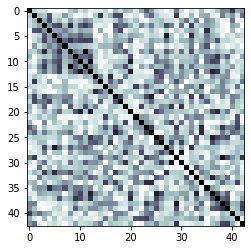

In [88]:
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');

Testing success ratio: 0.7

Prediction from datapoints set:
  ground truth: ['unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe']
  prediction:   ['safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'safe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe', 'unsafe'

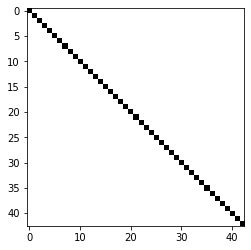

In [79]:
from qiskit.aqua.algorithms import SklearnSVM

result = SklearnSVM(training_input, test_input, datapoints[0]).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')

kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');